# Proyek Analisis Data: Bike Sharing Dataset

*   Nama: Haiqel Aziizul Hakeem
*   Email: haiqelhakeem@gmail.com
*   ID Dicoding: Haiqel Aziizul Hakeem





# Menentukan Pertanyaan Bisnis

1. Pada musim apa penyewaan sepeda paling banyak dan kapan penyewaan paling sedikit? Apa yang dapat dilakukan untuk meningkatkan penyewaan?
2. Apa pengaruh cuaca dan hari terhadap jumlah penyewaan sepeda?

# Import Library dan Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
100% 286k/286k [00:00<00:00, 1.05MB/s]
100% 286k/286k [00:00<00:00, 1.04MB/s]


In [4]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


# Data Wrangling

## Gathering Data

In [5]:
df = pd.read_csv('day.csv')

Pada tahap ini kita memasukkan file csv day.csv ke dalam dataframe sebagai df untuk diolah

## Assessing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah menggunakan

```
df.info()
```
kita mengetahui bahwa dataframe ini terdiri dari 731 baris dengan tipe data int atau float dan tidak ada null.


### Catatan
1. instant: Index
2. dteday: Tanggal
3. season: Musim (1: semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
4. yr: Tahun (0: 2011, 1: 2012)
5. mnth: Bulan (1 hingga 12)
6. hr: Jam (0 hingga 23)
7. holiday: Apakah hari tersebut hari libur atau tidak (diambil dari jadwal libur)
8. weekday: Hari dalam seminggu
9. workingday: Jika hari tersebut bukan akhir pekan atau hari libur, maka nilainya 1, jika tidak nilainya 0.
10. weathersit:
* 1: Cerah, Sedikit berawan, Sebagian berawan
* 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit berawan, Kabut
* 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar
* 4: Hujan deras + Es + Petir + Kabut, Salju + Kabut
11. temp: Suhu yang telah dinormalisasi dalam Celsius. Nilai dibagi dengan 41 (maksimum)
12. atemp: Suhu yang dirasakan (dinormalisasi) dalam Celsius. Nilai dibagi dengan 50 (maksimum)
13. hum: Kelembaban yang telah dinormalisasi. Nilai dibagi dengan 100 (maksimum)
14. windspeed: Kecepatan angin yang telah dinormalisasi. Nilai dibagi dengan 67 (maksimum)
15. casual: Jumlah pengguna kasual
16. registered: Jumlah pengguna terdaftar
17. cnt: Total jumlah sepeda yang disewa, termasuk pengguna kasual dan terdaftar

In [7]:
# Lihat beberapa row dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berdasarkan kode

```
df.head()
```

kita mendapatkan informasi mengenai kolom apa saja yang terdapat di dalam file day.csv. Contohnya adalah pada tanggal 1 Januari 2011 tepatnya pada musim semi hari Sabtu, weekend telah tercatat jumlah sepeda yang disewakan adalah 985 buah (331 sebagai penyewa biasa dan 654 sebagai penyewa terdaftar).

## Cleaning Data

In [9]:
# Konversi dteday ke format date time
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping season sesuai dengan namanya
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

In [10]:
print(f"Date time:\n {df['dteday']}\n")
print(f"Season:\n {df['season']}")

Date time:
 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

Season:
 0      Spring
1      Spring
2      Spring
3      Spring
4      Spring
        ...  
726    Spring
727    Spring
728    Spring
729    Spring
730    Spring
Name: season, Length: 731, dtype: object


In [11]:
# Mapping cuaca
weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
df['weather_label'] = df['weathersit'].map(weather_map)

In [12]:
# Mapping Hari
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['weekday_label'] = df['weekday'].map(weekday_map)

Setelah data dibersihkan dengan konversi tipe data dan decoding class, data dapat dibaca dan diolah dengan lebih mudah.

# EDA (Exploratory Data Analysis)

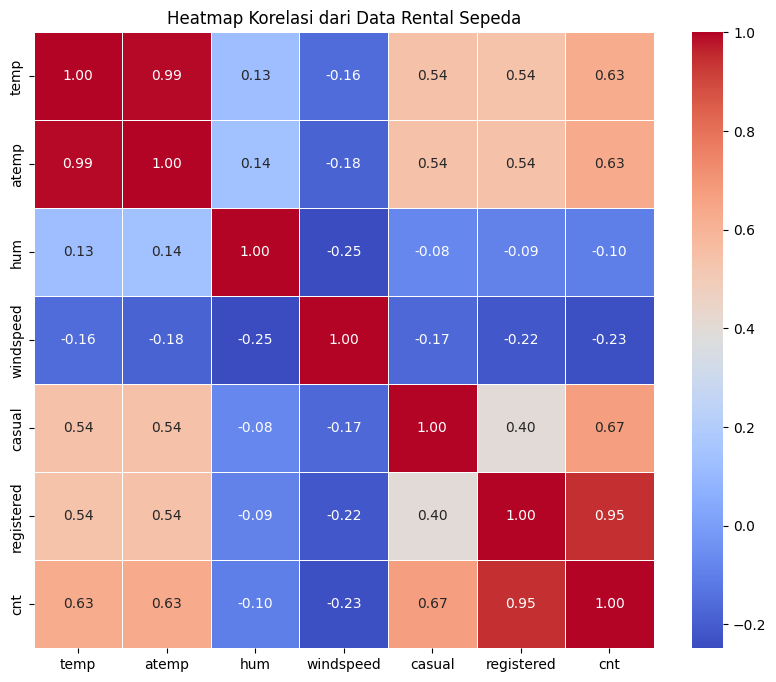

In [13]:
# Melihat korelasi tiap kolom
corr_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_df = df[corr_columns]
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi dari Data Rental Sepeda')
plt.show()

Disini kita menggunakan heatmap untuk melihat seberapa terkaitnya antar kolom. Semakin mendekati nilai 1 maka semakin kuat relasi antar kolom. Disini kita dapat melihat bahwa yang paling tinggi adalah: temp dengan atemp, registered dengan count, serta casual dengan count. Akan tetapi plot ini tidak menyertakan kolom dteday, season, dan weather.

In [14]:
# Kelompokkan data berdasarkan cuaca dan hari kemudian hitung rata-rata penyewaan sepedanya
weather_day_impact = df.groupby(['weather_label', 'weekday_label'])[['casual', 'registered', 'cnt']].mean().reset_index()
print(weather_day_impact)

      weather_label weekday_label       casual   registered          cnt
0             Clear        Friday   685.970149  4328.955224  5014.925373
1             Clear        Monday  1396.270270  2952.202703  4348.472973
2             Clear      Saturday   865.952381  4212.730159  5078.682540
3             Clear        Sunday  1667.358209  3308.522388  4975.880597
4             Clear      Thursday   688.312500  4646.015625  5334.328125
5             Clear       Tuesday   702.363636  3783.287879  4485.651515
6             Clear     Wednesday   651.387097  4338.516129  4989.903226
7   Light Rain/Snow        Friday   126.000000  1257.333333  1383.333333
8   Light Rain/Snow        Monday   120.000000   907.000000  1027.000000
9   Light Rain/Snow        Sunday   408.500000  1604.000000  2012.500000
10  Light Rain/Snow      Thursday   118.142857  1354.000000  1472.142857
11  Light Rain/Snow       Tuesday   111.000000  1282.500000  1393.500000
12  Light Rain/Snow     Wednesday   178.500000  270

In [15]:
# Memperbaiki urutan hari
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weather_day_impact['weekday_label'] = pd.Categorical(weather_day_impact['weekday_label'], categories=weekday_order, ordered=True)

# Sorting
weather_day_impact = weather_day_impact.sort_values('weekday_label')

In [16]:
# Kelompokkan data berdasarkan musim dan hitung rata-rata penyewaan sepedanya
seasonal_trends = df.groupby('season')['cnt'].mean( ).reset_index()
print(seasonal_trends)

   season          cnt
0    Fall  5644.303191
1  Spring  2604.132597
2  Summer  4992.331522
3  Winter  4728.162921


In [17]:
# Filter data untuk musim semi
spring_data = df[df['season'] == 'Spring']

# Mengelompokkan kondisi cuaca pada musim semi
weather_in_spring = spring_data['weather_label'].value_counts().reset_index()
weather_in_spring.columns = ['Weather Condition', 'Count']

In [ ]:
# Display the weather distribution table
print(weather_in_spring)

  Weather Condition  Count
0             Clear    111
1       Mist/Cloudy     66
2   Light Rain/Snow      4


Setelah kita lakukan EDA, kita mendapat insight mengenai rata-rata penyewaan sepeda pada tiap musim dan rata-rata penyewaan sepeda berdasarkan pengaruh dari cuaca dan hari. Penggunaan reset index karena setelah menggunakan groupby() kita ingin menjadikan kolom yang telah diolah menjadi regular columns.

# Visualization and Explanatory Analysis

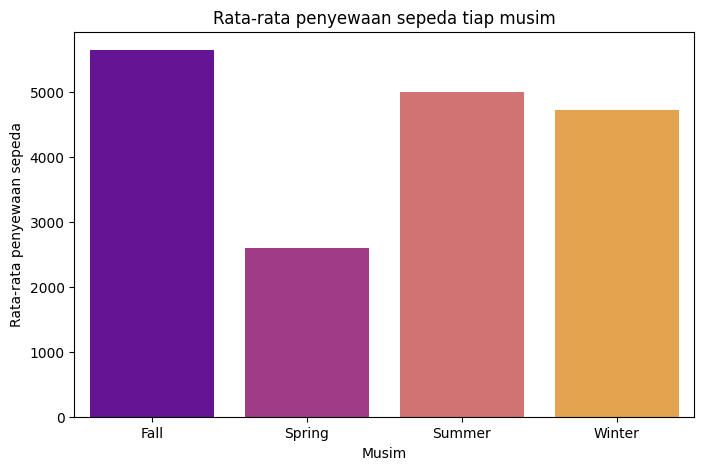

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', hue='season', data=seasonal_trends, palette='plasma', legend=False)
plt.title('Rata-rata penyewaan sepeda tiap musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata penyewaan sepeda')
plt.show()

Berdasarkan grafik dapat ditarik kesimpulan bahwa penyewaan terbanyak adalah pada musim gugur dan paling sedikit musim semi. Mari kita telusuri cuaca di musim semi.

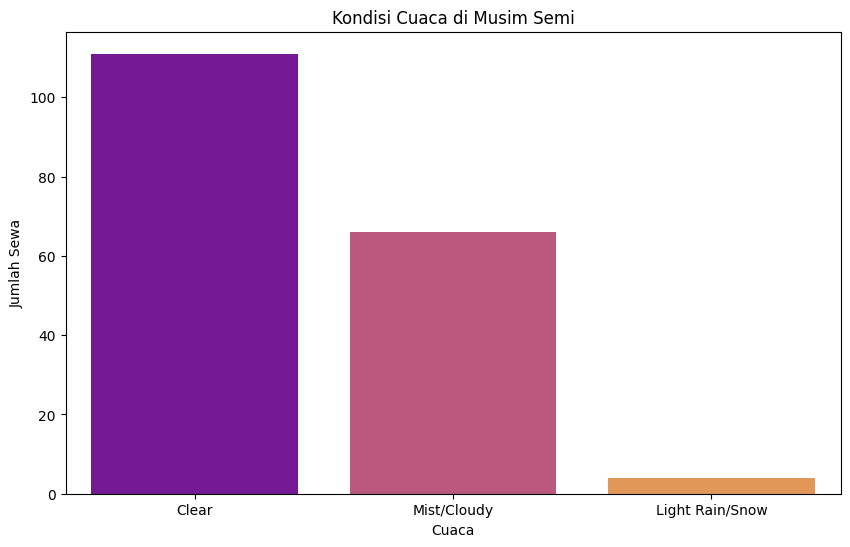

In [23]:
# Kondisi cuaca di musim semi
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Condition', y='Count', hue='Weather Condition', data=weather_in_spring, palette='plasma', legend=False)
plt.title('Kondisi Cuaca di Musim Semi')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()

Berdasarkan data dapat dilihat bahwa cuaca di musim semi cenderung cerah. Tingkat penyewaan yang rendah pada musim semi sepertinya berdasarkan faktor eksternal yang tidak terdapat dalam dataset. Contohnya seperti: Kurangnya promosi, kebiasaan konsumen pada musim semi yang kurang beraktivitas menggunakan sepeda, dll.

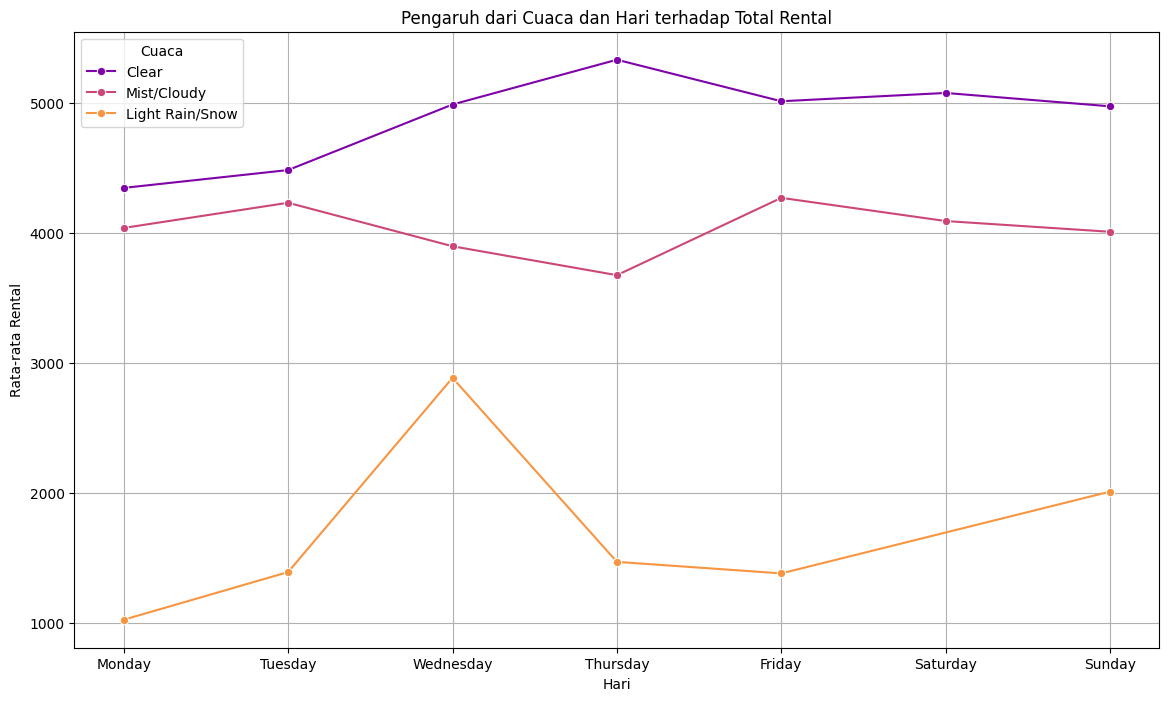

In [ ]:
# Plot Pengaruh dari Cuaca dan Hari
plt.figure(figsize=(14, 8))
sns.lineplot(x='weekday_label', y='cnt', hue='weather_label', data=weather_day_impact, marker='o', palette='plasma')
plt.title('Pengaruh dari Cuaca dan Hari terhadap Total Rental')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Rental')
plt.legend(title='Cuaca')
plt.grid(True)
plt.show()

Berdasarkan grafik dapat disimpulkan bahwa tingkat penyewaan tertinggi adalah pada hari kamis dengan cuaca cerah dan terendah pada hari senin dengan cuaca gerimis atau bersalju.

# Conclusion

1. Pada musim apa penyewaan sepeda paling banyak dan kapan penyewaan paling sedikit? Apa yang dapat dilakukan untuk meningkatkan penyewaan?
  * Puncak penyewaan sepeda paling banyak adalah pada musim gugur. Kemudian paling sedikit adalah pada musim semi. Pada musim gugur, kemungkinan cuaca dan suasana yang ditawarkan lebih menarik para pesepeda. Sedangkan pada musim semi konsumen kurang tertarik untuk menyewa sepeda. Untuk meningkatkan penyewaan ini dapat dilakukan dengan meningkatkan promosi dan marketing penyewaan, dikarenakan faktor lain seperti cuaca sudah mendukung untuk aktivitas bersepeda.

2. Apa pengaruh cuaca dan hari terhadap tingkat penyewaan sepeda?
  * Berdasarkan grafik yang diperoleh dapat disimpulkan bahwa cuaca yang cerah meningkatkan jumlah penyewa sepeda. Dapat dilihat bahwa penyewaan terbanyak adalah pada hari kamis. Meski begitu jumlah penyewa yang konstan dengan berbagai jenis cuaca adalah pada saat weekend. Sedangkan weekday, jumlah penyewa sangat bergantung cuaca.